In [14]:
import tensorflow as tf 
from tensorflow import keras

In [24]:
%pip install matplotlib

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [17]:
train_images.shape
type(train_images)

numpy.ndarray

In [18]:
train_images[0,23,23]

194

In [19]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [27]:
print(train_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2341 - accuracy: 0.9123
Epoch 2/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2237 - accuracy: 0.9155
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2184 - accuracy: 0.9184
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2101 - accuracy: 0.9211
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2065 - accuracy: 0.9233
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1996 - accuracy: 0.9259
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1933 - accuracy: 0.9271


In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8861
Test accuracy: 0.8860999941825867


In [34]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [35]:
predictions[0]

array([4.0775124e-08, 1.1123223e-10, 4.0466372e-08, 1.5541080e-10,
       2.0040839e-11, 1.4763146e-05, 2.2066378e-07, 3.0983568e-03,
       5.9419686e-10, 9.9688655e-01], dtype=float32)

In [37]:
np.argmax(predictions[1])

2

In [38]:
test_labels[1]

2

1/1 [==============================] - 0s 36ms/step


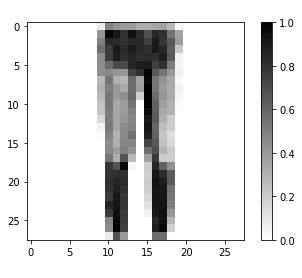

In [47]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
